In [1]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
import seaborn as sns

# Configuração visual
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = [10, 6]

# 1. Carregar os dados
try:
    df = pd.read_csv('dados_vagas_linkedin.csv')
    print(f"Dados carregados: {df.shape[0]} vagas encontradas.")
except FileNotFoundError:
    print("Arquivo não encontrado. Verifique o nome.")

# 2. Função mágica para converter "['Python', 'SQL']" (texto) em lista real
def limpar_e_converter(item):
    try:
        # Se for nulo ou 'N/A', retorna lista vazia
        if pd.isna(item) or item == 'N/A' or item == '[]':
            return []
        # Converte a string que parece lista em lista de verdade
        return ast.literal_eval(item)
    except:
        return [] # Se der erro, retorna vazio


Dados carregados: 21 vagas encontradas.


/tmp/ipykernel_38792/2220084083.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_tech.values, y=top_tech.index, palette="viridis")


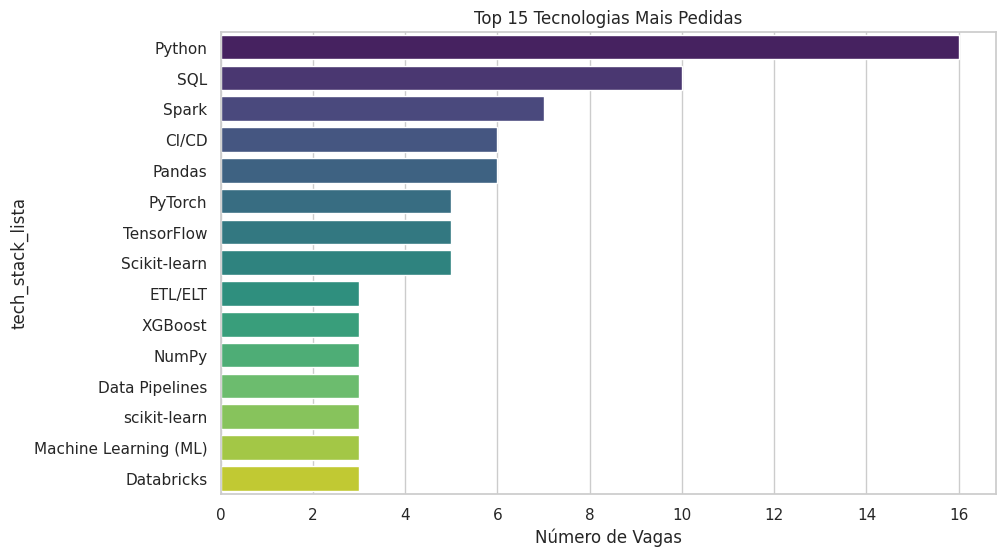

In [2]:

# Aplicar a conversão nas colunas de interesse
df['tech_stack_lista'] = df['tech_stack'].apply(limpar_e_converter)
df['cloud_lista'] = df['cloud'].apply(limpar_e_converter)
df['soft_skills_lista'] = df['soft_skills'].apply(limpar_e_converter)

# --- ANÁLISE 1: TOP TECNOLOGIAS (Tech Stack) ---
# "Explode" separa a lista em várias linhas (uma para cada tecnologia)
top_tech = df.explode('tech_stack_lista')['tech_stack_lista'].value_counts().head(15)

plt.figure()
sns.barplot(x=top_tech.values, y=top_tech.index, palette="viridis")
plt.title("Top 15 Tecnologias Mais Pedidas")
plt.xlabel("Número de Vagas")
plt.show()



/tmp/ipykernel_38792/29002967.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cloud.values, y=top_cloud.index, palette="magma")


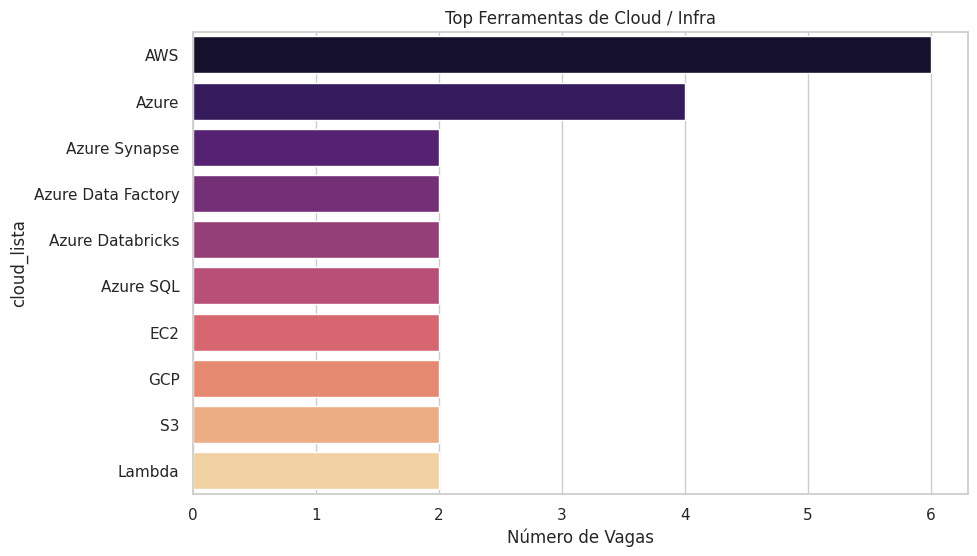

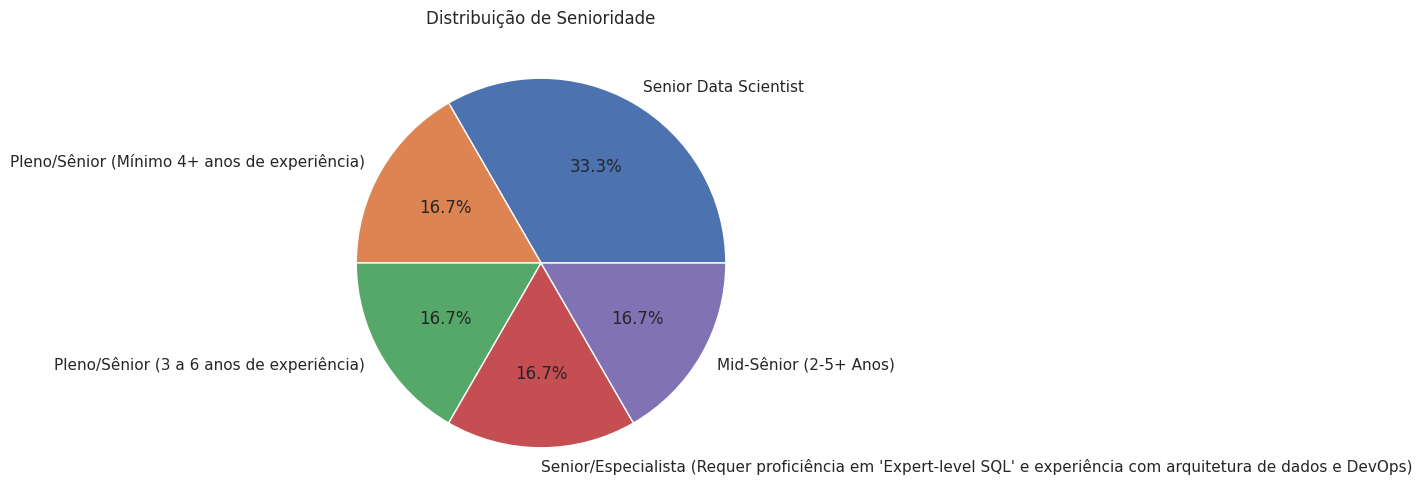


Insight: Das 17 vagas de Python, 6 mencionam AWS explicitamente.


In [3]:
# --- ANÁLISE 2: TOP CLOUD E FERRAMENTAS ---
top_cloud = df.explode('cloud_lista')['cloud_lista'].value_counts().head(10)

if not top_cloud.empty:
    plt.figure()
    sns.barplot(x=top_cloud.values, y=top_cloud.index, palette="magma")
    plt.title("Top Ferramentas de Cloud / Infra")
    plt.xlabel("Número de Vagas")
    plt.show()
else:
    print("Nenhuma ferramenta de Cloud encontrada ou extraída.")

# --- ANÁLISE 3: SENIORIDADE ---
plt.figure()
df['senioridade'].value_counts().head(5).plot(kind='pie', autopct='%1.1f%%', ylabel='')
plt.title("Distribuição de Senioridade")
plt.show()

# --- DICA EXTRA: Cruzar dados ---
# Ex: Quantas vagas de "Python" também pedem "AWS"?
vagas_python = df[df['tech_stack'].str.contains('Python', na=False, case=False)]
tem_aws = vagas_python['cloud'].str.contains('AWS', na=False, case=False).sum()
print(f"\nInsight: Das {len(vagas_python)} vagas de Python, {tem_aws} mencionam AWS explicitamente.")